In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
import scipy.optimize as opt


In [23]:
def refractiveindex(pctEthanol):
    #get the refractive index using the slope from the dn/dc measurement of Ethanol-Water Mixture from 3% to 9%
    
    m = 0.5317 #slope from dn/dc graph
    x = pctEthanol*(1e-3) #Volume Fraction of Ethanol in solvent (needed converted from g/ml, since that's not actually how it was measured, to actually %Ethanol)
    b = 1.3333 #intercept which is just waters refractive index since we measured relative to that
    y = m*x + b
    
    return y #I don't think refractive index has units, it's just comparing sin(angles)'s


Text(0, 0.5, 'Viscosity in mPa*s')

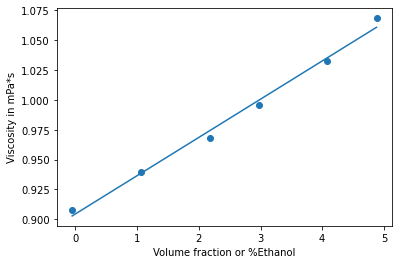

In [16]:
#points from doing webplotdigitizer to graph from https://www.rheosense.com/applications/viscosity/two-component-mixtures
    # X values in %Ethanol - Y values in mPa*s
    #-0.053050397877981936 , 0.9074446680080483 
    #1.0610079575596814    , 0.9396378269617709
    #2.1750663129973447    , 0.9678068410462775
    #2.9708222811671092    , 0.9959758551307849
    #4.084880636604776     , 1.0321931589537225
    #4.880636604774537     , 1.0684104627766602
    
pctEthanolDATA = np.array([
    -0.053050397877981936 ,
    1.0610079575596814    ,
    2.1750663129973447    ,
    2.9708222811671092    ,
    4.084880636604776     ,
    4.880636604774537     
    ])

ViscosityDATA = np.array([
    0.9074446680080483,
    0.9396378269617709,
    0.9678068410462775,
    0.9959758551307849,
    1.0321931589537225,
    1.0684104627766602
])

m, b = np.polyfit(pctEthanolDATA, ViscosityDATA, 1)

plt.scatter(pctEthanolDATA, ViscosityDATA)
plt.plot(pctEthanolDATA, m*(pctEthanolDATA)+b)

plt.xlabel("Volume fraction or %Ethanol")
plt.ylabel("Viscosity in mPa*s")


In [54]:
def viscosity(pctEthanol):
    #basic slope intercept from data but making it a function so it's a little more useful
    
    x = pctEthanol #Volume Fraction of Ethanol in solvent
    y = m*x + b
    
    eta = y*(1e-2) #converting from mPa*s to g / cm*s
    
    return eta #Units - g / cm*s


In [55]:
SampleInfo = [
    #Format SampleInfo[Sample][0 - Sample Name, 1 - Viscosity, 2 - Refractive index, 3 - B value from fitting y = A*exp(-2*B*x) at a given Angle][*for Angles* 0 - 60 deg, 1 - 90 deg, 2 - 120 deg]
    
    #["_ mg/ml _ k Mn PEO in ___% Ethanol-Water", viscosity(___) ,refractiveindex(___) , [ _______ , _______ , _______ ]],
    ["Sample Name", "Viscosity", "Refractive Index", ["B @ 60 deg", "B @ 90 deg", "B @ 120 deg"]],
    
    ["3 mg/ml 5 k Mn PEO in 0% Ethanol-Water"     , viscosity(0.0) , refractiveindex(0.0) , [ 0.00039 , 0.00121  , 0.00213 ]],
    ["3 mg/ml 5 k Mn PEO in 1.5% Ethanol-Water"   , viscosity(1.5) , refractiveindex(1.5) , [ 0.35314 , 0.50000  , 0.00381 ]],#bad graphs :(
    ["3 mg/ml 1.4 k Mn PEO in 1.5% Ethanol-Water" , viscosity(1.5) , refractiveindex(1.5) , [ 0.00001 , 0.01058  , 0.05202 ]],
    ["3 mg/ml 5 k Mn PEO in 2.5% Ethanol-Water"   , viscosity(2.5) , refractiveindex(2.5) , [ 0.00001 , 0.00348  , 0.03019 ]],
    ["3 mg/ml 5 k Mn PEO in 3% Ethanol-Water"     , viscosity(3.0) , refractiveindex(3.0) , [ 0.00118 , 0.00936  , 0.01572 ]],

    ["7 mg/ml 5 k Mn PEO in 0.5% Ethanol-Water"   , viscosity(0.5) , refractiveindex(0.5) , [ 0.01006 , 0.02650  , 0.04304 ]],
    ["7 mg/ml 5 k Mn PEO in 1% Ethanol-Water"     , viscosity(1.0) , refractiveindex(1.0) , [ 0.01413 , 0.03161  , 0.04378 ]],
    ["7 mg/ml 5 k Mn PEO in 1.5% Ethanol-Water"   , viscosity(1.5) , refractiveindex(1.5) , [ 0.00980 , 0.02947  , 0.03318 ]],
    ["7 mg/ml 5 k Mn PEO in 2.5% Ethanol-Water"   , viscosity(2.5) , refractiveindex(2.5) , [ 0.01023 , 0.03675  , 0.04896 ]],
    
    ["13 mg/ml 1.4 k Mn PEO in 0.5% Ethanol-Water", viscosity(0.5) , refractiveindex(0.5) , [ 0.02382 , 0.03274  , 0.05757 ]],
    ["13 mg/ml 1.4 k Mn PEO in 1.5% Ethanol-Water", viscosity(1.5) , refractiveindex(1.5) , [ 0.01673 , 0.02425  , 0.05186 ]],
    ["13 mg/ml 1.4 k Mn PEO in 2.5% Ethanol-Water", viscosity(2.5) , refractiveindex(2.5) , [ 0.02631 , 0.04395  , 0.06815 ]],
    
]

print(SampleInfo[1][0])

3 mg/ml 5 k Mn PEO in 0% Ethanol-Water


In [56]:
def scatteringvec(SampleArray, Angle): 
    #should be SampleArray = SampleInfo[Sample] and Angle = 0,1,2 corresponding to whichever angle you want
    
    refractiveindex = SampleArray[2] #Refractive Index of the sample
    wavelength = 637 # Units - nm, comes from the wavelength of the laser used in the DLS
    radianarray = [(60*np.pi)/180,(90*np.pi)/180,(120*np.pi)/180]
    angle = radianarray[Angle] #Angle = 0,1,2 with (0 - 60 deg, 1 - 90 deg, 2 - 120 deg)
    
    q = ( 4*np.pi*(refractiveindex)*(np.sin(angle/2)) )/(wavelength) #Units 1/nm
    
    return q


In [57]:
def diffusioncoef(SampleArray, Angle):
    #should be SampleArray = SampleInfo[Sample] and Angle = 0,1,2 corresponding to whichever angle you want
    
    q = scatteringvec(SampleArray, Angle) #Units 1/nm
    tau = SampleArray[3][Angle] #Units - 1/microsec
    
    D = tau/(q*q) #Units - nm^2 / microsec
    
    return D


In [65]:
def hydrorad(SampleArray, Angle):
    #should be SampleArray = SampleInfo[Sample] and Angle = 0,1,2 corresponding to whichever angle you want

    kB = 1.380649*(1e-16) #Units - g*cm^2 / K*s^2
    T = 298.15 #Units - Kelvin, room temperature which should be the temperature of the sample
    D = diffusioncoef(SampleArray, Angle)*(1e-8) #Units - converting nm^2 / microsec to cm^2 / s
    viscosity = SampleArray[1] #Units - g / cm*s, Viscosity of the sample
    print()
    
    Rh = (kB*T)/(6*np.pi*D*viscosity)*(1e7) #Units - converting cm to nm (depends a lot on units of viscosity)
    print(SampleArray[0])
    
    return Rh

In [66]:
for i in range(1, 13):
    for j in range(3):
        print(hydrorad(SampleInfo[i], j), "nm")
        print(" ")


3 mg/ml 5 k Mn PEO in 0% Ethanol-Water
107.06720750744077 nm
 

3 mg/ml 5 k Mn PEO in 0% Ethanol-Water
69.01853045934199 nm
 

3 mg/ml 5 k Mn PEO in 0% Ethanol-Water
58.81156468718578 nm
 

3 mg/ml 5 k Mn PEO in 1.5% Ethanol-Water
0.11241455668507645 nm
 

3 mg/ml 5 k Mn PEO in 1.5% Ethanol-Water
0.1587923061910717 nm
 

3 mg/ml 5 k Mn PEO in 1.5% Ethanol-Water
31.25832799036843 nm
 

3 mg/ml 1.4 k Mn PEO in 1.5% Ethanol-Water
3969.8076547767896 nm
 

3 mg/ml 1.4 k Mn PEO in 1.5% Ethanol-Water
7.504362296364447 nm
 

3 mg/ml 1.4 k Mn PEO in 1.5% Ethanol-Water
2.28939311117462 nm
 

3 mg/ml 5 k Mn PEO in 2.5% Ethanol-Water
3843.7565981768016 nm
 

3 mg/ml 5 k Mn PEO in 2.5% Ethanol-Water
22.09055516193566 nm
 

3 mg/ml 5 k Mn PEO in 2.5% Ethanol-Water
3.8195660134251104 nm
 

3 mg/ml 5 k Mn PEO in 3% Ethanol-Water
32.06573779283939 nm
 

3 mg/ml 5 k Mn PEO in 3% Ethanol-Water
8.084950981955238 nm
 

3 mg/ml 5 k Mn PEO in 3% Ethanol-Water
7.220910418998188 nm
 

7 mg/ml 5 k Mn PEO in 0.

In [12]:
List = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]


print(List[2][0])

7


In [13]:
A = [1,2,2,2,2,2,2]
print(A[0])

1


In [14]:
B = np.zeros((3,3,2))
B[1][1][1] = 1
print(B)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 1.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]
